
# Final Project Assignment Description:
We have given a heart disease dataset in class. Perform EDA Analysis consisting of 8-9 Graphs.
The Model applied should be accurate to around 90 %
You may apply any model of your choice.


# About the dataset:


Attribute Information:                                           
1.age
2.sex
3.chest pain type (4 values)
4.resting blood pressure
5.serum cholestoral in mg/dl
6.fasting blood sugar > 120 mg/dl
7.resting electrocardiographic results (values 0,1,2)
8.maximum heart rate achieved
9.exercise induced angina
10.oldpeak = ST depression induced by exercise relative to rest
11.the slope of the peak exercise ST segment
12.number of major vessels (0-3) colored by flourosopy
13.thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
14.The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.    
The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

In [17]:
#Importing the dependencies
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data Collection and preprocessing

In [7]:
data =pd.read_csv("heart.csv")

# Exploratory Data Analysis

In [8]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [9]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [11]:
data.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1021,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1022,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1023,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [13]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [14]:
data['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


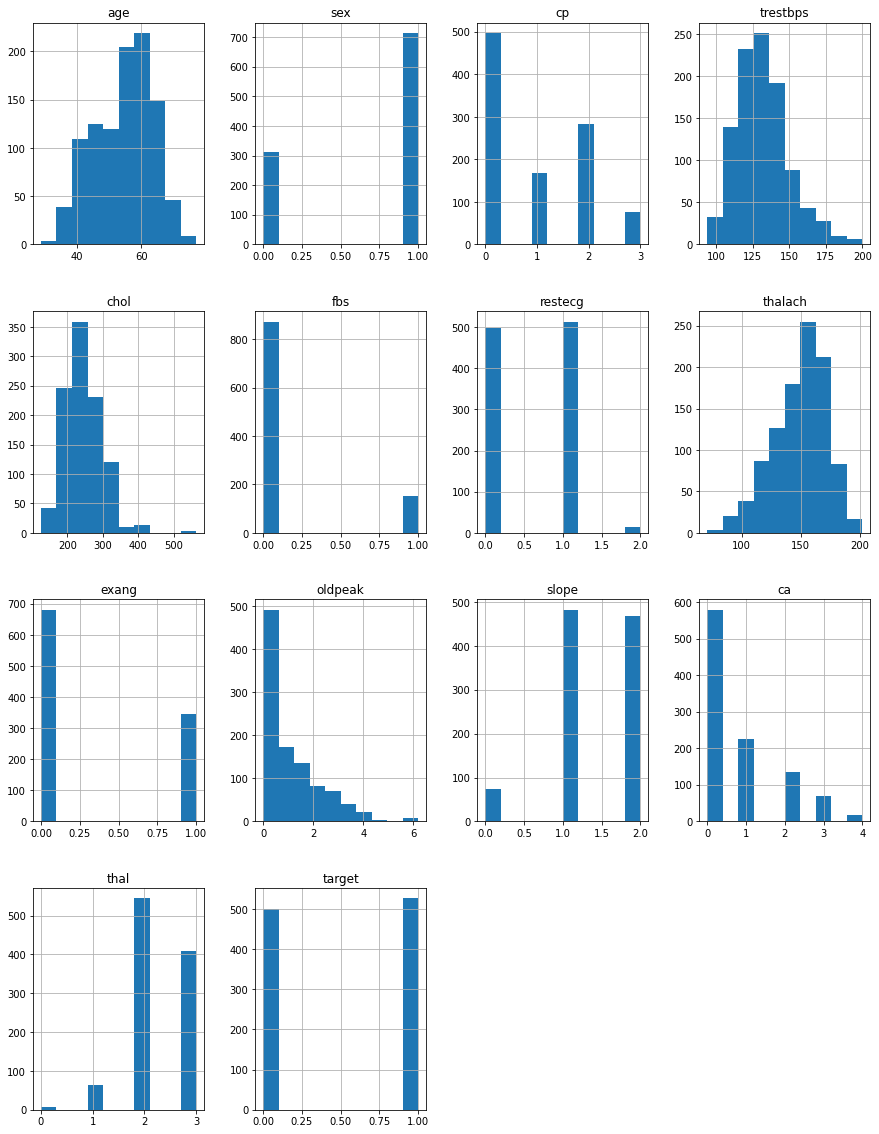

In [15]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
data.hist(ax = ax)
plt.show()

# Missing data
we can use seaborn to create a simple heatmap to see where we are missing data.

<AxesSubplot:>

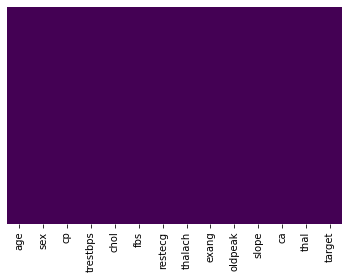

In [18]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

 The graph shows that there is not any null values in the dataset

<AxesSubplot:xlabel='sex', ylabel='count'>

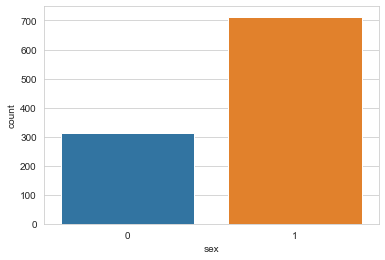

In [19]:
# (1 = male; 0 = female)
sns.set_style('whitegrid')
sns.countplot(x='sex', data=data)

<AxesSubplot:xlabel='target', ylabel='count'>

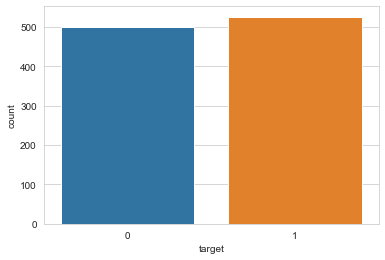

In [20]:
sns.set_style('whitegrid')
sns.countplot(x='target', data=data)

<AxesSubplot:xlabel='target', ylabel='count'>

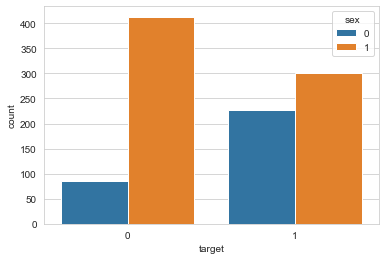

In [21]:
sns.set_style('whitegrid')
sns.countplot(x='target', hue='sex',data=data)

<AxesSubplot:xlabel='age'>

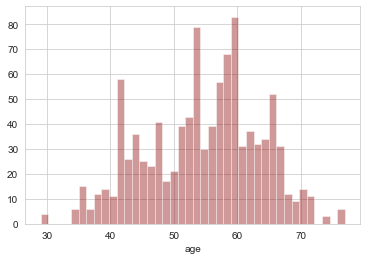

In [22]:
sns.distplot(data['age'].dropna(), kde=False, color='darkred',bins=40)

<AxesSubplot:>

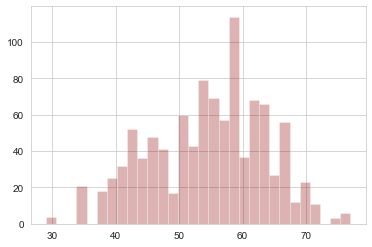

In [23]:
data['age'].hist(bins=30, color='darkred', alpha=0.3)

<AxesSubplot:xlabel='thal', ylabel='count'>

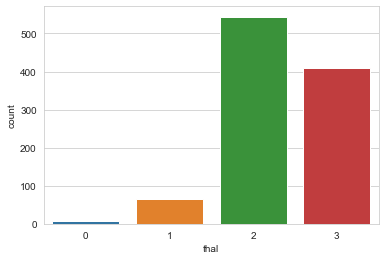

In [24]:
# thal:1 = normal; 2 = fixed defect; 3 = reversable defect
sns.countplot(x='thal', data=data)

<AxesSubplot:xlabel='thal', ylabel='count'>

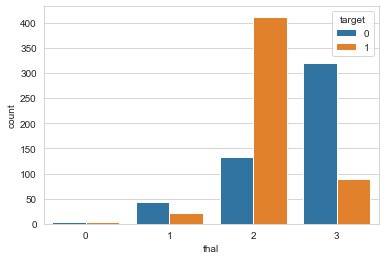

In [26]:
# thal:1 = normal; 2 = fixed defect; 3 = reversable defect
sns.countplot(x='thal',hue='target', data=data)

In [27]:
data.groupby('sex')['target'].value_counts()

sex  target
0    1         226
     0          86
1    0         413
     1         300
Name: target, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='count'>

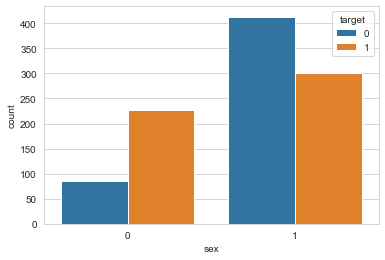

In [28]:
sns.countplot(x='sex',hue='target',data=data)

<AxesSubplot:xlabel='age', ylabel='count'>

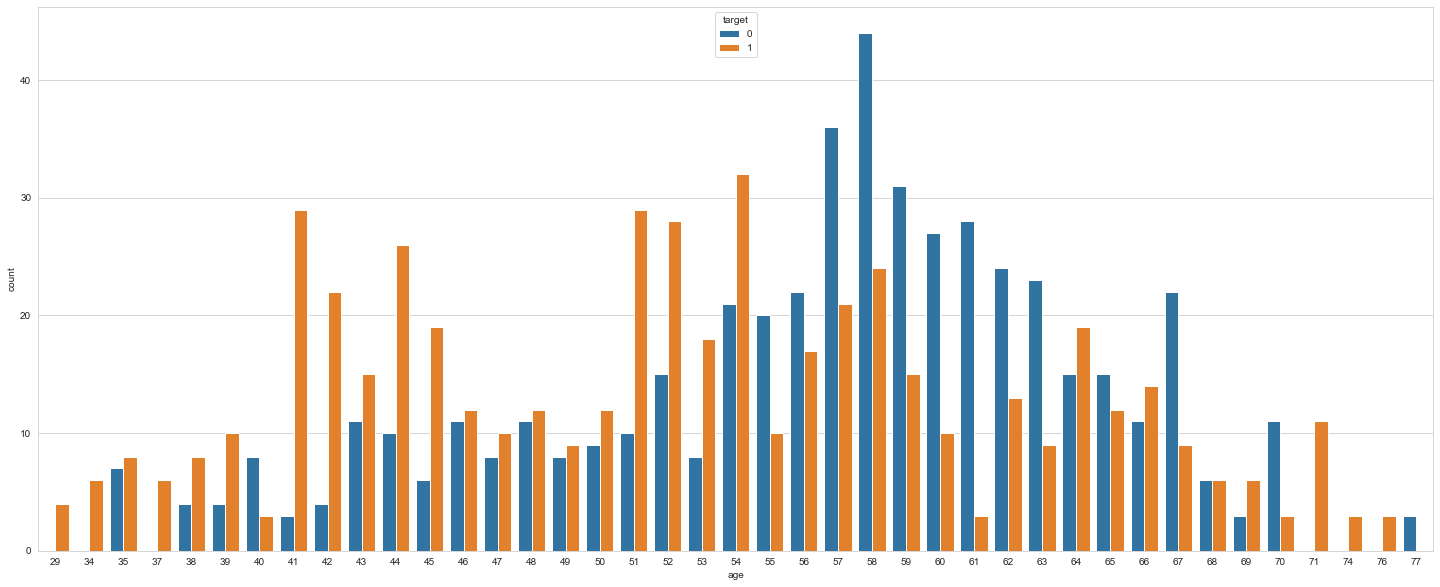

In [29]:
plt.figure(figsize=(25,10))
sns.countplot(x='age', hue='target', data=data)

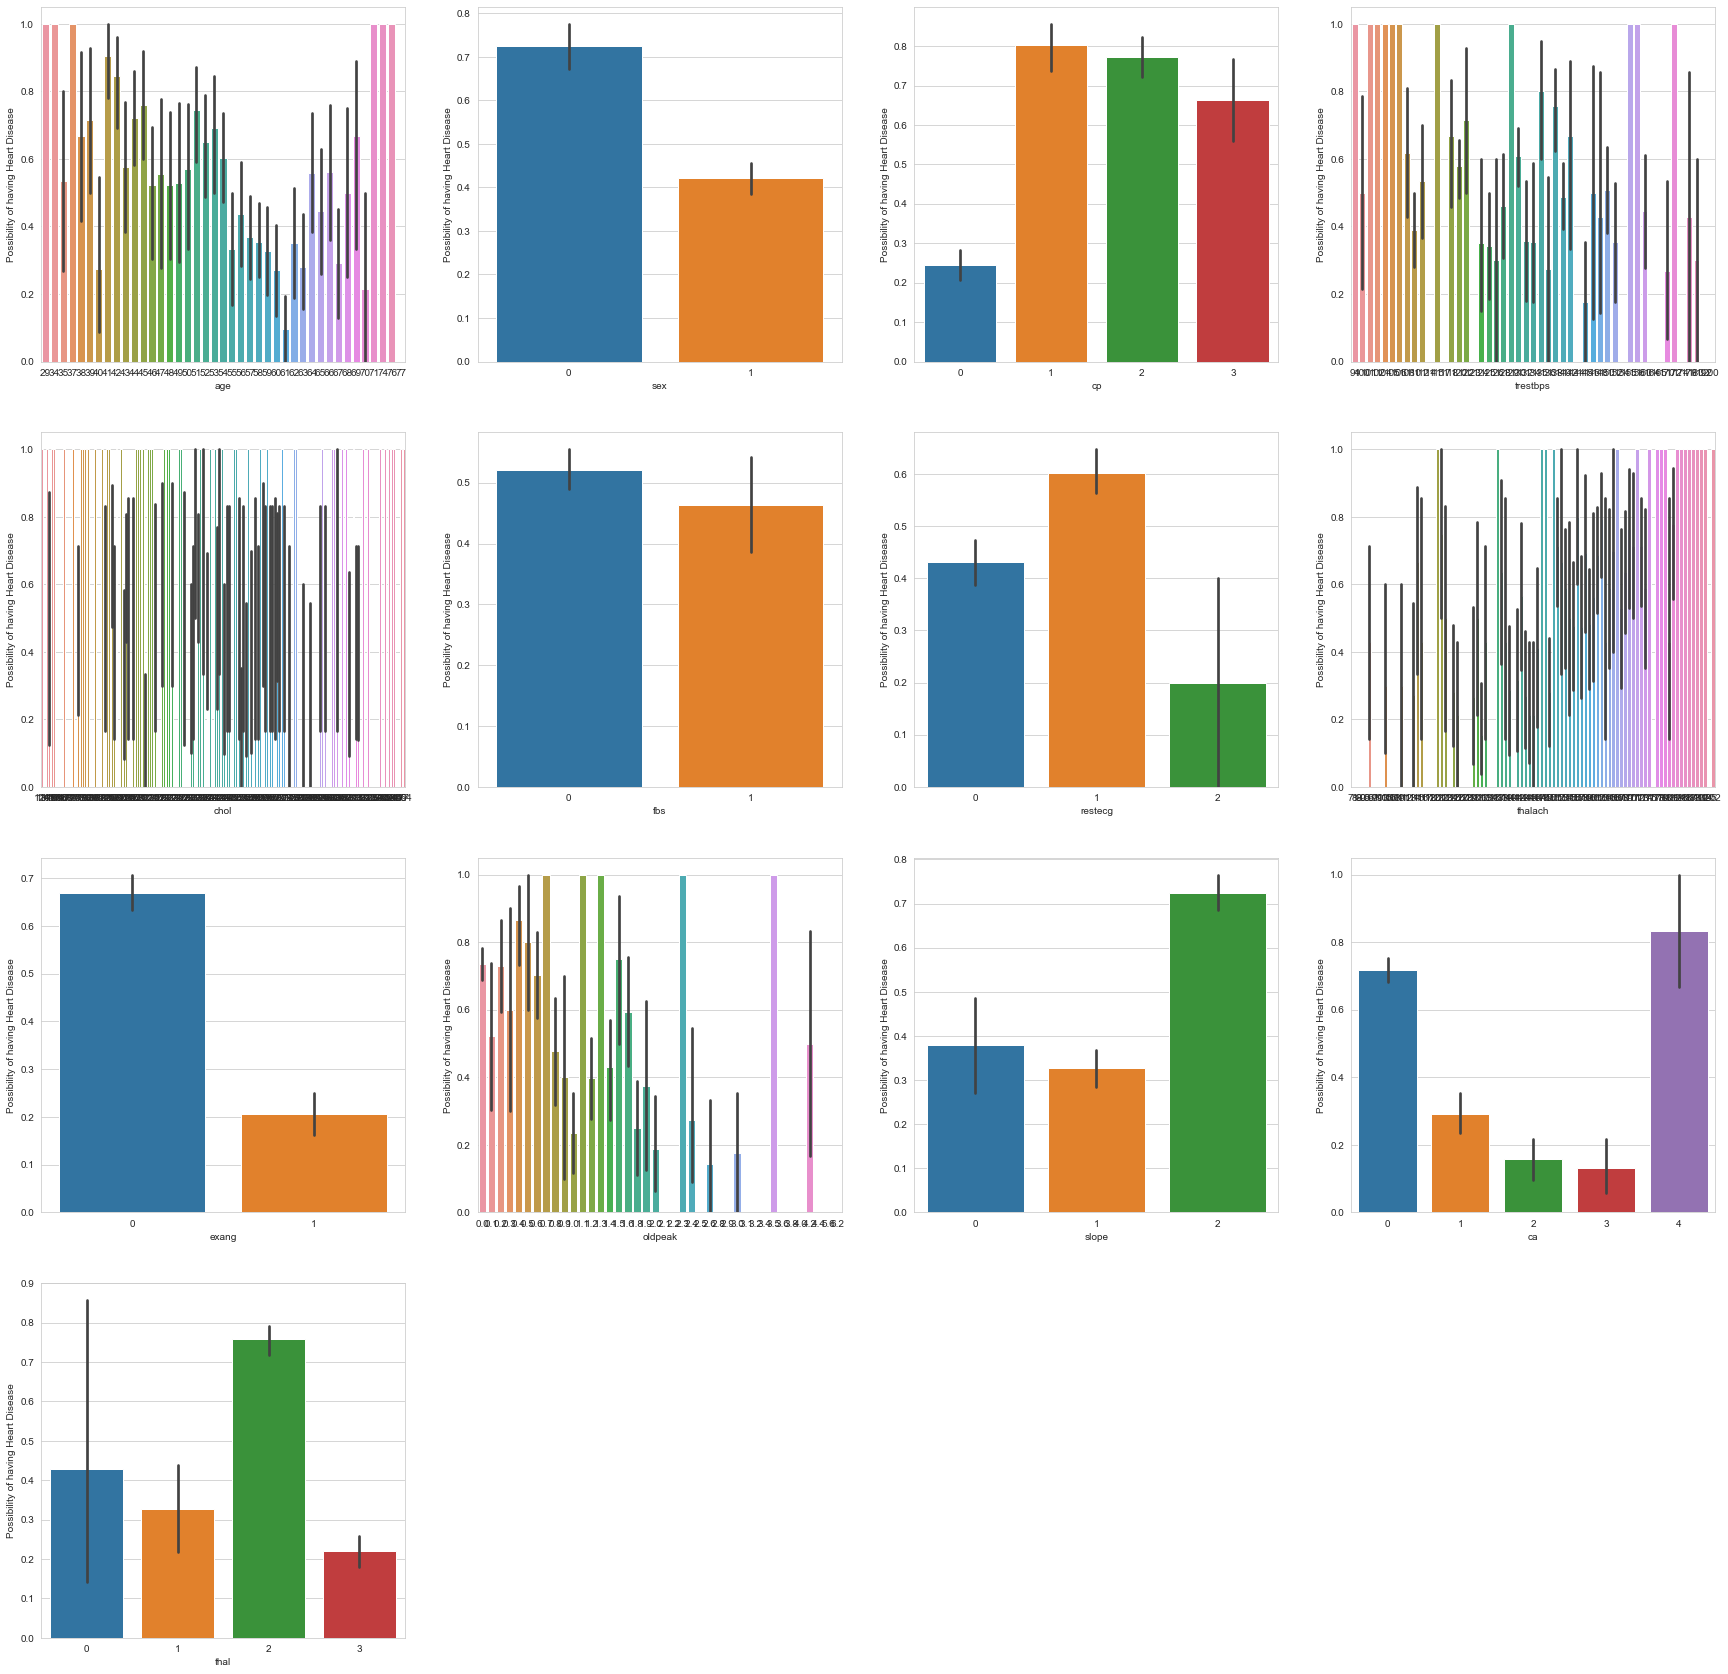

In [30]:
categorical_values=list(data.columns)
categorical_values.remove('target')
plt.figure(figsize=(30,30))

for i, col in enumerate(categorical_values, 1):
    plt.subplot(4,4,i)
    sns.barplot(x=f"{col}",y='target', data=data)
    plt.ylabel("Possibility of having Heart Disease")
    plt.xlabel(f"{col}")

<AxesSubplot:>

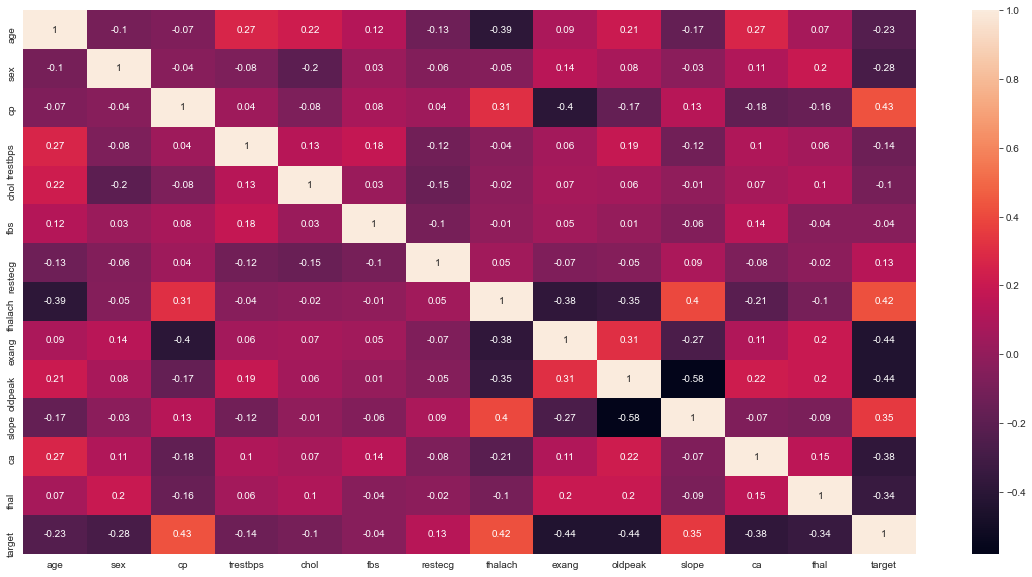

In [31]:
# Showing the Corelation between columns in the dataset
plt.figure(figsize=(20,10))
sns.heatmap(np.round(data.corr(),2), annot=True)

# Model Training

In [34]:
#data splitting
X = data.drop(columns='target',axis=1)
Y = data['target']

In [35]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [36]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2 )

In [38]:
X.shape

(1025, 13)

In [39]:
X_train.shape

(820, 13)

In [40]:
X_test.shape

(205, 13)

In [41]:
DT = DecisionTreeClassifier()
RT = LogisticRegression()

In [42]:
DT.fit(X_train, Y_train)
RT.fit(X_train, Y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Model Evaluation

In [55]:
#Accuracy Score on training data of LogisticRegression
X_train_pred_RT = RT.predict(X_train)
training_data_acc_RT = accuracy_score(X_train_pred_RT, Y_train)
print("Accuracy of Logistic Regression is: ",training_data_acc_RT*100)

Accuracy of Logistic Regression is:  85.24390243902438


In [54]:
#Accuracy Score on training data of DecisionTreeClassifier
X_train_pred_DT = DT.predict(X_train)
training_data_acc_DT = accuracy_score(X_train_pred_DT, Y_train)
print("Accuracy of DecisionTreeClassifier is: ",training_data_acc_DT*100)

Accuracy of DecisionTreeClassifier is:  100.0


In [56]:
#Accuracy Score on test data of LogisticRegression
X_test_pred_RT = RT.predict(X_test)
test_data_acc_RT = accuracy_score(X_test_pred_RT, Y_test)
print("Accuracy of Logistic Regression is: ",training_data_acc_RT*100)

Accuracy of Logistic Regression is:  85.24390243902438


In [58]:
#Accuracy Score on test data of DecisionTreeClassifier
X_test_pred_DT = DT.predict(X_test)
test_data_acc_DT = accuracy_score(X_test_pred_DT, Y_test)
print("Accuracy of DecisionTreeClassifier is: ",training_data_acc_RT*100)

Accuracy of DecisionTreeClassifier is:  85.24390243902438


# Confusion Matrix on this test data

Confusion matrix For Decision Tree

In [60]:
con_mat = confusion_matrix(Y_test , X_test_pred_DT )
con_mat

array([[100,   0],
       [  0, 105]], dtype=int64)

In [62]:
# Confusion matrix Metrics
from sklearn.metrics import classification_report
matrix=classification_report(Y_test,X_test_pred_DT)
print("Classification Report",matrix)

Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



Text(0.5, 1.0, 'Confusion Matrix')

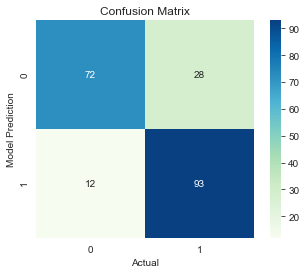

In [63]:
axes = sns.heatmap(con_mat, square=True, annot=True, fmt='d', cbar=True, cmap=plt.cm.GnBu)
axes.set_xlabel('Actual')
axes.set_ylabel('Model Prediction')
axes.set_title("Confusion Matrix")

# Prediction

In [69]:
#Building a Predictive System
input_data = [20,0,0,100,248,0,0,122,0,1,2,0,2]

#change the input_data to numpy array
np_input_data = np.asarray(input_data)

#Reshape the array as we are predicting for only an instance
input_data_reshape = np_input_data.reshape(1,-1)

prediction = DT.predict(input_data_reshape)
if(prediction[0]==0):
    print('The Person does not have a Heart Disease Problem')
else:
    print('The Person have a Heart Disease Problem')

The Person have a Heart Disease Problem


In [70]:
#Building a Predictive System
input_data = [52,1,0,125,248,0,1,168,0,1,2,2,3]

#change the input_data to numpy array
np_input_data = np.asarray(input_data)

#Reshape the array as we are predicting for only an instance
input_data_reshape = np_input_data.reshape(1,-1)

prediction = DT.predict(input_data_reshape)
if(prediction[0]==0):
    print('The Person does not have a Heart Disease Problem')
else:
    print('The Person have a Heart Disease Problem')

The Person does not have a Heart Disease Problem


# THE End !!